## パッケージインポート

In [2]:
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import math 
from time import sleep
from tqdm import tqdm
import networkx as nx
plt.rcParams['font.family'] = 'IPAexGothic'

## データ加工

In [335]:
file_path = './/resources//ALL_SEASON_TEMOTI_POKEMON.csv'

In [336]:
df = pd.read_csv(file_path, encoding='utf-8')
df.columns = ['Season', 'Rule', 'Pokemon_From', 'Pokemon_To', 'Weight']
df['Weight'] = 10-df['Weight']


df_season11_double = df[(df['Season']==11)&(df['Rule']=='Double')]
df_season11_double = df_season11_double.drop(['Season', 'Rule'], axis=1)
df_season11_double

Pokemon_From Pokemon_To  Weight
91369        フシギダネ       ラプラス       9
91370        フシギダネ       ゼニガメ       8
91371        フシギダネ      ケンタロス       7
91372        フシギダネ      ピカチュウ       6
91373        フシギダネ      リザードン       5
...            ...        ...     ...
95615        ウーラオス        ピッピ       4
95616        ウーラオス      アシレーヌ       3
95617        ウーラオス      ナットレイ       2
95618        ウーラオス      ライチュウ       1
95619        ウーラオス      ポリゴンＺ       0

[4251 rows x 3 columns]

In [337]:
df_rank = pd.read_csv('.//resources//Season11_Double_Ado_Rank.csv', encoding='utf-8')
df_season11_double = df_season11_double[df_season11_double['Pokemon_From'].isin(list(df_rank['Pokemon'])[:100])]
df_season11_double = df_season11_double[df_season11_double['Pokemon_To'].isin(list(df_rank['Pokemon'])[:100])]
# df_season11_double.to_csv('.//resources//Season11_Double_Weight.csv', index=False)
df_season11_double

Pokemon_From Pokemon_To  Weight
91394        リザードン      キュウコン       9
91395        リザードン      トリトドン       8
91396        リザードン        ピッピ       7
91397        リザードン      テラキオン       6
91398        リザードン       ヤミラミ       5
...            ...        ...     ...
95615        ウーラオス        ピッピ       4
95616        ウーラオス      アシレーヌ       3
95617        ウーラオス      ナットレイ       2
95618        ウーラオス      ライチュウ       1
95619        ウーラオス      ポリゴンＺ       0

[985 rows x 3 columns]

![image1](./docs/images/default_network.png)

In [197]:
import networkx as nx
network_np = df_season11_double.values
G = nx.DiGraph()
G.add_weighted_edges_from(network_np)

## 中心性の導出

### 次数中心性

In [135]:
degree_centers = nx.degree_centrality(G)
df_dc = pd.DataFrame(sorted(degree_centers.items(), key=lambda x: x[1], reverse=True), columns=['Pokemon', 'Degree centrality'])
df_dc.head(10)

Pokemon  Degree centrality
0   ウーラオス           1.152174
1  ファイアロー           1.065217
2   モロバレル           1.043478
3   アシレーヌ           1.021739
4   ウインディ           0.913043
5   ナットレイ           0.804348
6   サマヨール           0.782609
7  パッチラゴン           0.673913
8     ピッピ           0.652174
9    ラプラス           0.543478

![image2](./docs/images/degree_centrality.png)

### 近接中心性

In [136]:
close_centers = nx.closeness_centrality(G)
df_cc = pd.DataFrame(sorted(close_centers.items(), key=lambda x: x[1], reverse=True), columns=['Pokemon', 'Closeness centrality'])
df_cc.head(10)

Pokemon  Closeness centrality
0   ウーラオス              0.920000
1  ファイアロー              0.884615
2   モロバレル              0.867925
3   アシレーヌ              0.836364
4   ウインディ              0.779661
5   ナットレイ              0.707692
6   サマヨール              0.707692
7  パッチラゴン              0.657143
8     ピッピ              0.647887
9    ラプラス              0.597403

![image3](./docs/images/closeness_centrality.png)

### 媒介中心性

In [137]:
between_centers = nx.betweenness_centrality(G)
df_bc = pd.DataFrame(sorted(between_centers.items(), key=lambda x: x[1], reverse=True), columns=['Pokemon', 'Betweenness centrality'])
df_bc.head(10)

Pokemon  Betweenness centrality
0  ファイアロー                0.083513
1   ウーラオス                0.067275
2  ウオノラゴン                0.064929
3   アシレーヌ                0.063619
4    ラプラス                0.062225
5   モロバレル                0.062167
6   ポリゴンＺ                0.056017
7   テラキオン                0.055767
8   リザードン                0.050926
9   ナットレイ                0.049105

![image4](./docs/images/betweenness_centrality.png)

### 固有ベクトル中心性

In [138]:
eigen_centers = nx.eigenvector_centrality_numpy(G)
df_ec = pd.DataFrame(sorted(eigen_centers.items(), key=lambda x: x[1], reverse=True), columns=['Pokemon', 'Eigen centrality'])
df_ec.head(10)

Pokemon  Eigen centrality
0   ウーラオス          0.374682
1   アシレーヌ          0.362823
2  ファイアロー          0.341624
3   モロバレル          0.333149
4   サマヨール          0.296529
5   ウインディ          0.291606
6  パッチラゴン          0.262992
7   ナットレイ          0.259587
8     ピッピ          0.239173
9    ラプラス          0.218848

![image5](./docs/images/eigen_centrality.png)

In [332]:
pageranks = nx.pagerank(G)
df_pr = pd.DataFrame(sorted(pageranks.items(), key=operator.itemgetter(1),reverse = True), columns=['Pokemon', 'Page Rank'])
df_pr.head(10)

Pokemon  Page Rank
0   アシレーヌ   0.120686
1  ファイアロー   0.101711
2   モロバレル   0.093069
3   サマヨール   0.070248
4   ウインディ   0.063116
5  パッチラゴン   0.054378
6   ウーラオス   0.049695
7   ナットレイ   0.043712
8     ピッピ   0.036546
9   ブリムオン   0.030283

![image13](./docs/images/pagerank.png)

In [333]:
df_master = df_dc
for _ in  [df_cc, df_bc, df_ec, df_pr]:
    df_master = pd.merge(df_master, _, how = 'inner', on = 'Pokemon')

In [334]:
df_master.to_csv('.//resources//Season11_Double_Centrality.csv', index = False)

### おまけ

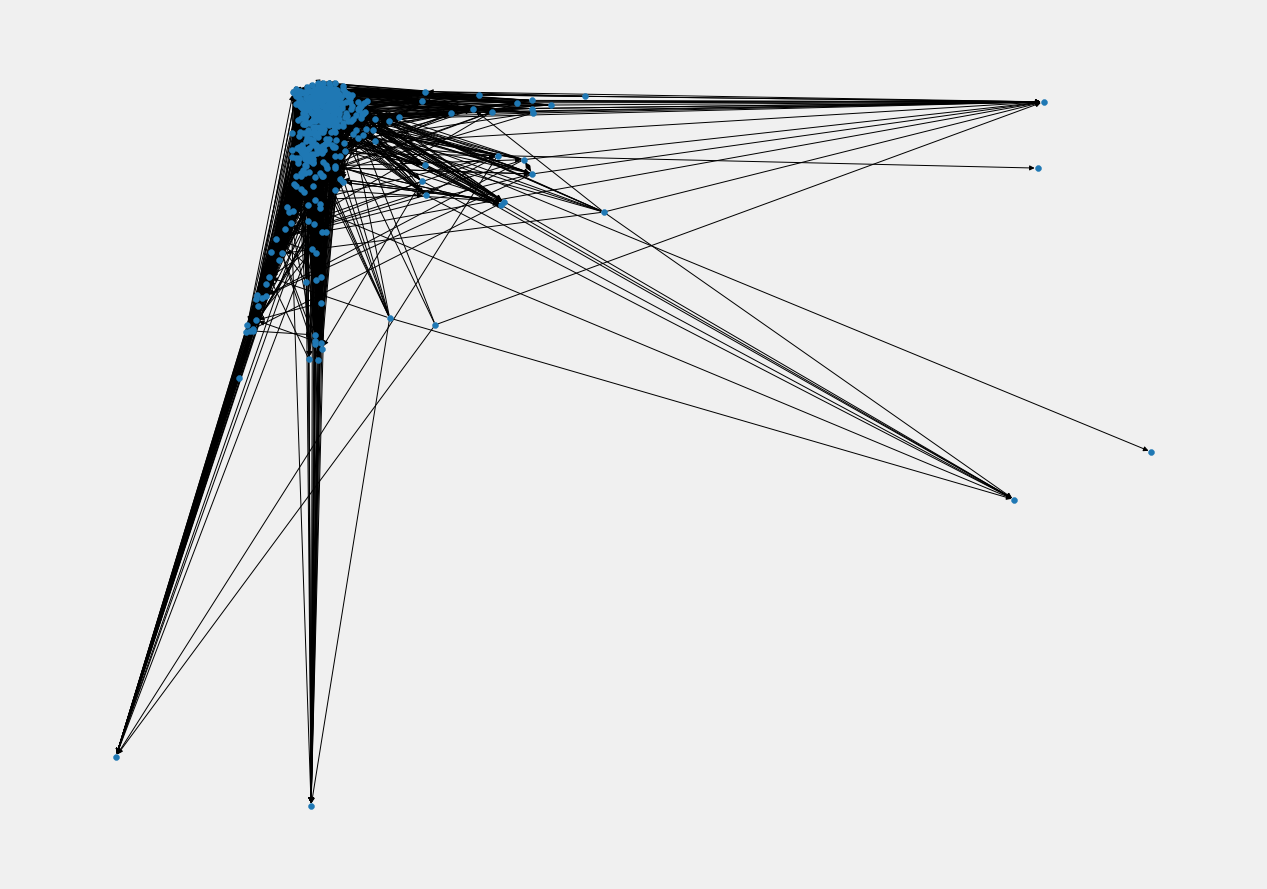

In [180]:
pos = nx.spring_layout(G)
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')

nx.draw_networkx(G, pos, with_labels = False, node_size = 35)
plt.show()

In [178]:
pageranks = nx.pagerank(G)
from pprint import pprint
import operator
sorted_pagerank = sorted(pageranks.items(), key=operator.itemgetter(1),reverse = True)
pprint(sorted_pagerank)

[('アシレーヌ', 0.10750250975436723),
 ('ファイアロー', 0.09399635922113453),
 ('モロバレル', 0.08376163071653592),
 ('サマヨール', 0.06127620595049732),
 ('ウインディ', 0.05654096180119297),
 ('パッチラゴン', 0.04915980616913678),
 ('ウーラオス', 0.04593506185368289),
 ('ナットレイ', 0.03818556852384359),
 ('ピッピ', 0.03390300824896017),
 ('ブリムオン', 0.02695629511139571),
 ('ラプラス', 0.024564568046507963),
 ('ドサイドン', 0.016228347369046145),
 ('ダダリン', 0.014804416499906149),
 ('リザードン', 0.013742461846150276),
 ('ジュラルドン', 0.01373022657034323),
 ('オーロンゲ', 0.013616535681171837),
 ('ポリゴンＺ', 0.012645896576564087),
 ('テラキオン', 0.009129219511060471),
 ('トリトドン', 0.007309105953053263),
 ('セキタンザン', 0.006603857592288386),
 ('キュウコン', 0.006318570877116523),
 ('アマージョ', 0.0061672985380771825),
 ('ライチュウ', 0.0061235396453417565),
 ('キュワワー', 0.00570566940101542),
 ('ニンフィア', 0.005510712119435404),
 ('ガルーラ', 0.005487413890598744),
 ('ウォーグル', 0.003980048213573066),
 ('ゲンガー', 0.003799409819329906),
 ('ペリッパー', 0.003060779193878252),
 ('ウオノラゴン', 0.002858766148

In [175]:
def plot_subgraph(target_name, G):
    first_degree_connected_nodes = list(G.neighbors(target_name))
    second_degree_connected_nodes = []

    for x in first_degree_connected_nodes:
        second_degree_connected_nodes+=list(G.neighbors(x))

    second_degree_connected_nodes.remove(target_name)
    second_degree_connected_nodes = list(set(second_degree_connected_nodes))
    subgraph_top = nx.subgraph(G,first_degree_connected_nodes+second_degree_connected_nodes)

    pos = nx.spring_layout(subgraph_top)
    node_color = ['yellow' if v == target_name else 'red' for v in subgraph_top]
    node_size =  [1000 if v == target_name else 35 for v in subgraph_top]

    plt.style.use('fivethirtyeight')
    plt.rcParams['figure.figsize'] = (20, 15)
    plt.axis('off')

    nx.draw_networkx(subgraph_top, pos,  with_labels = False,
        node_color=node_color, node_size=node_size )
    plt.show()

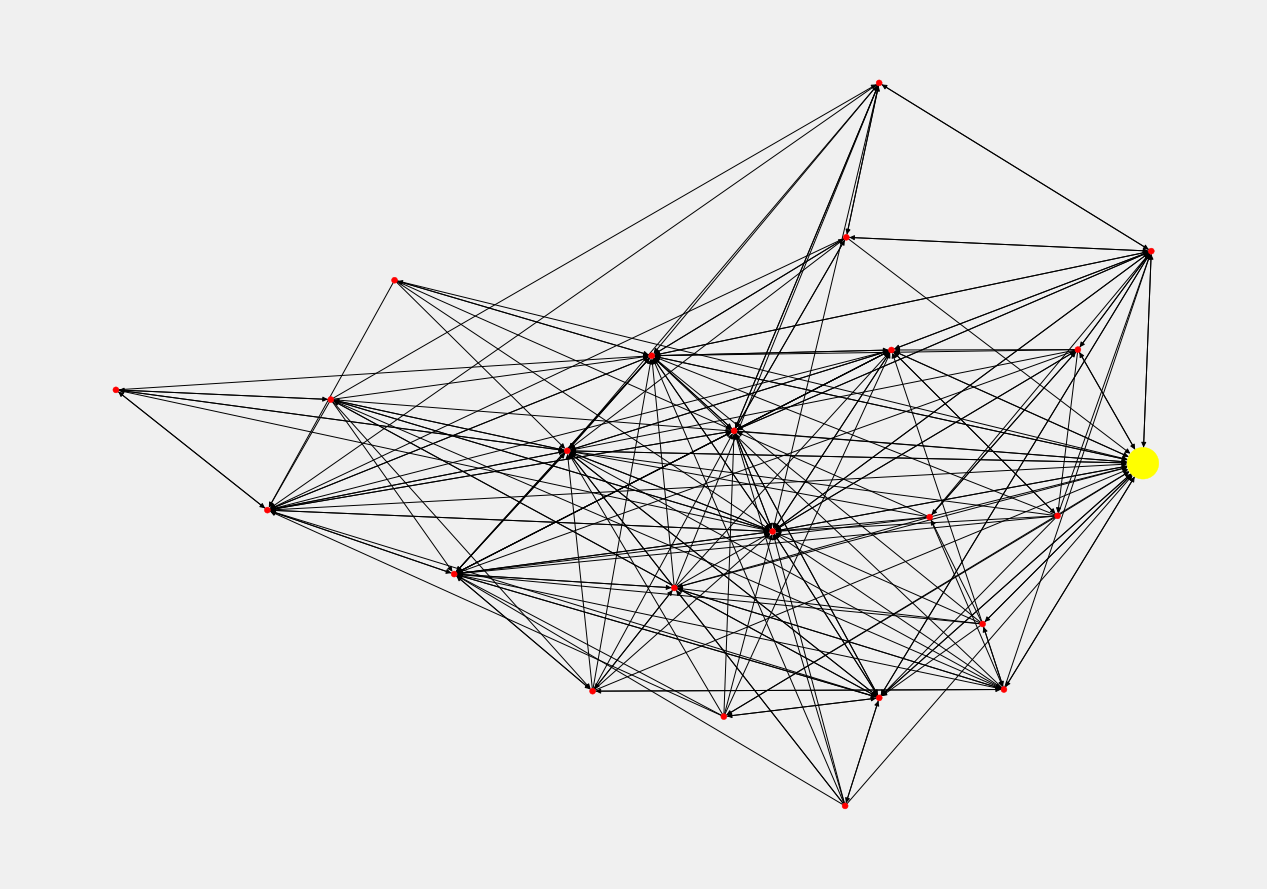

In [179]:
plot_subgraph('ファイアロー', G)

(-0.563991221280166,
 1.0058088182679576,
 -0.19233762418523076,
 1.113299050261945)

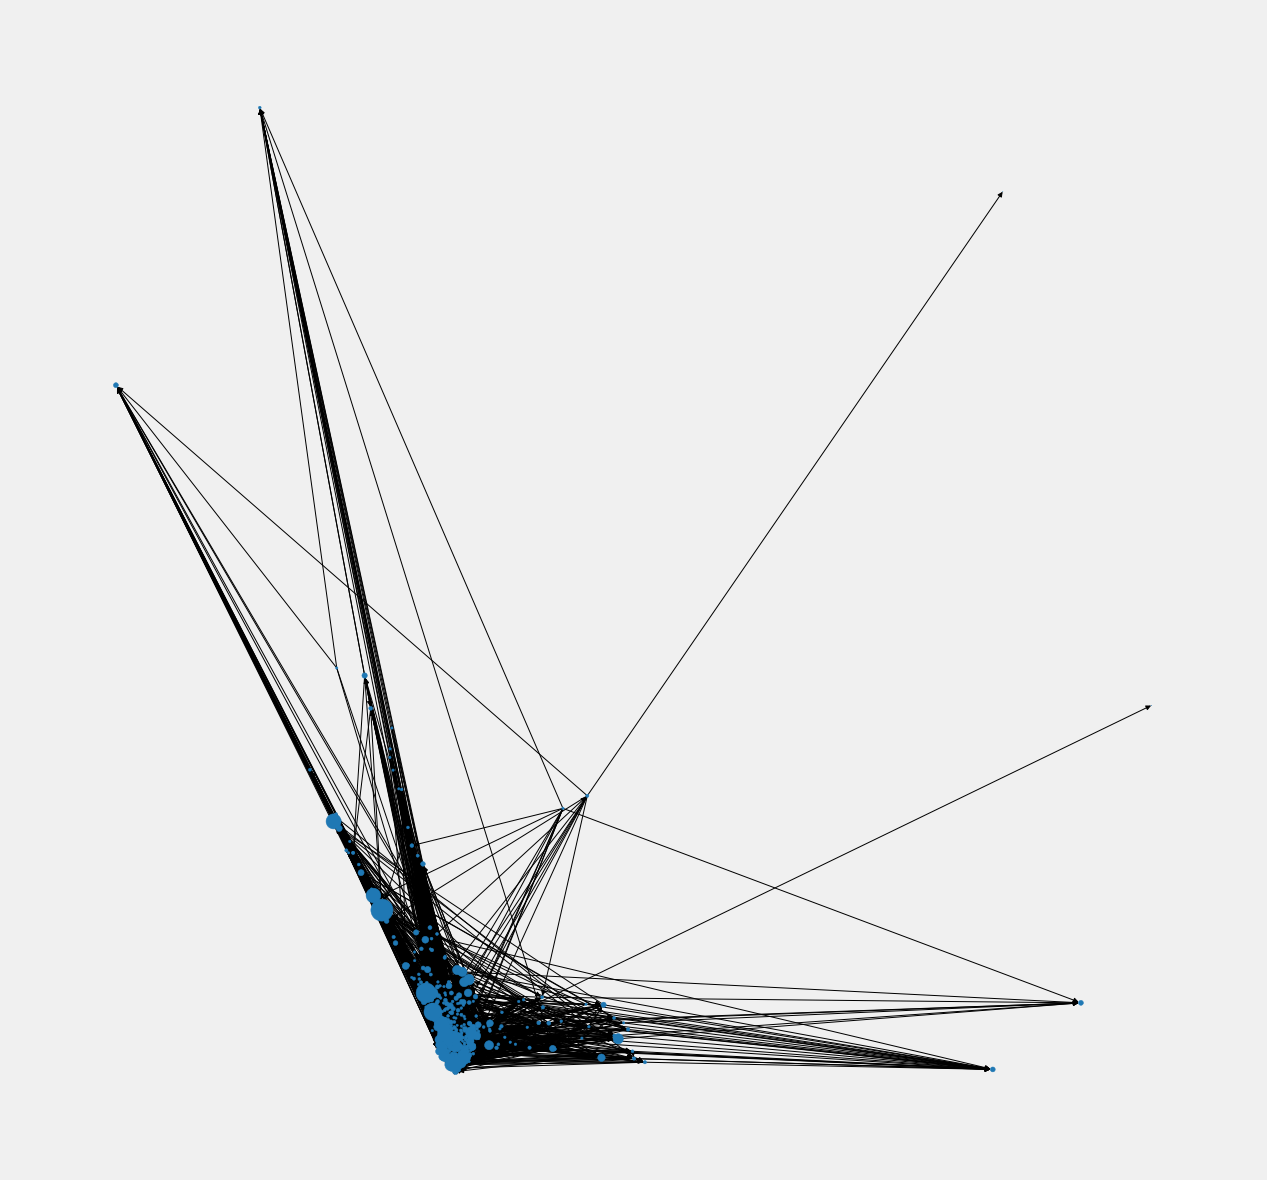

In [182]:
pos = nx.spring_layout(G)
betweennessCentrality = nx.betweenness_centrality(G,
    normalized=True, endpoints=True)
node_size =  [v * 10000 for v in betweennessCentrality.values()]
plt.figure(figsize=(20,20))

nx.draw_networkx(G, pos=pos, with_labels=False,
                node_size=node_size )
plt.axis('off')

## ネットワーク構造のクラスタリング

In [183]:
# !pip install python-louvain

Active code page: 65001
  Created wheel for python-louvain: filename=python_louvain-0.14-py3-none-any.whl size=9294 sha256=d2d64775727fc1623891feb099c78ffb4ba04c1df5041922036d2ea6149b1612
  Stored in directory: c:\users\sentenceiii\appdata\local\pip\cache\wheels\be\2d\1f\87004485ec41ab6f625f9320fd23d4755f2d7fe8cbc60d85dd
Successfully built python-louvain


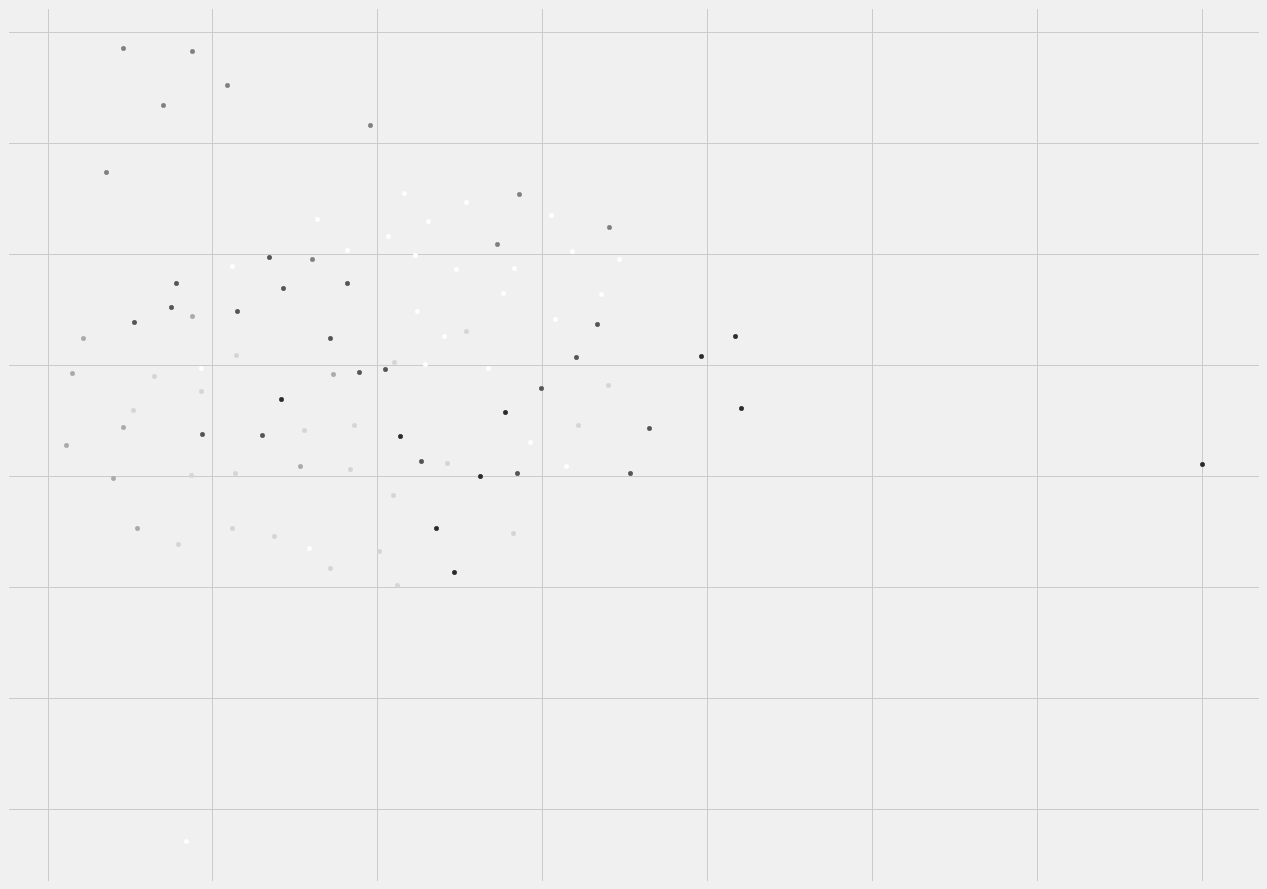

In [218]:
# 有向グラフを無向グラフに変換
G2 = nx.Graph(G)

import community
partition = community.best_partition(G2)
size = float(len(set(partition.values())))
pos = nx.spring_layout(G2)
count = 0.
for com in set(partition.values()):
    count += 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    nx.draw_networkx_nodes(G2, pos, list_nodes, node_size=20, node_color = str(count/size) )
plt.show()

In [247]:
partition = community.best_partition(G2)
partition2 = {}
for i in partition.keys():
    sub_dict = {'community' : partition[i]}
    partition2[i] = sub_dict

labels = dict([(i, str(i)) for i in range(nx.number_of_nodes(G2))])
labels2 = {}
for i in range(len(labels)):
    sub_dict = {'labels' : labels[i]}
    labels2[list(partition.keys())[i]] = sub_dict

nx.set_node_attributes(G2, labels2)
nx.set_node_attributes(G2, partition2)
nx.write_gml(G2, ".//resources//community.gml")

In [253]:
pd.DataFrame.from_dict(labels2).T.to_csv('.//resources//community_labels.csv')

In [277]:
df_pagerank = pd.DataFrame(sorted(pageranks.items(), key=operator.itemgetter(1),reverse = True), columns=['Pokemon', 'Page Rank'])
df_community = pd.concat([pd.DataFrame.from_dict(labels2).T, pd.DataFrame.from_dict(partition2).T], axis=1)
df_community = df_community.reset_index()
df_community.columns = ['Pokemon', 'label', 'community']

df_pagerank_community = pd.merge(left=df_pagerank, right=df_community, on = 'Pokemon')

In [278]:
df_pagerank_community.head()

Pokemon  Page Rank label  community
0   アシレーヌ   0.107503     7          3
1  ファイアロー   0.093996    12          3
2   モロバレル   0.083762     8          4
3   サマヨール   0.061276     9          4
4   ウインディ   0.056541    15          3

In [280]:
df_pagerank_community[df_pagerank_community['community']==0].head(10)

Pokemon  Page Rank label  community
13   リザードン   0.013742     0          0
18   トリトドン   0.007309     2          0
19  セキタンザン   0.006604    32          0
20   キュウコン   0.006319     1          0
30    ヤミラミ   0.002842     5          0
42   マニューラ   0.001501    68          0
46    ニューラ   0.001235    55          0
53   コバルオン   0.001133    56          0
61   リーフィア   0.000935    30          0
69   ビリジオン   0.000789    69          0

In [281]:
df_pagerank_community[df_pagerank_community['community']==1].head(10)

Pokemon  Page Rank label  community
8      ピッピ   0.033903     3          1
16   ポリゴンＺ   0.012646    27          1
17   テラキオン   0.009129     4          1
41   ペルシアン   0.001544    33          1
80   レントラー   0.000630    64          1
81  エンニュート   0.000629    92          1

In [282]:
df_pagerank_community[df_pagerank_community['community']==2].head(10)

Pokemon  Page Rank label  community
7    ナットレイ   0.038186     6          2
24   ニンフィア   0.005511    20          2
28   ペリッパー   0.003061    57          2
29  ウオノラゴン   0.002859    46          2
32   キングドラ   0.002468    49          2
33   ニョロトノ   0.002321    47          2
35   ルンパッパ   0.002233    50          2
37   ガマゲロゲ   0.001736    58          2
38   シュバルゴ   0.001626    59          2
39   マタドガス   0.001572    44          2

In [283]:
df_pagerank_community[df_pagerank_community['community']==3].head(10)

Pokemon  Page Rank label  community
0    アシレーヌ   0.107503     7          3
1   ファイアロー   0.093996    12          3
4    ウインディ   0.056541    15          3
5   パッチラゴン   0.049160    16          3
14  ジュラルドン   0.013730    24          3
15   オーロンゲ   0.013617    29          3
21   アマージョ   0.006167    17          3
26   ウォーグル   0.003980    23          3
27    ゲンガー   0.003799    43          3
34    ピクシー   0.002254    28          3

In [284]:
df_pagerank_community[df_pagerank_community['community']==4].head(10)

Pokemon  Page Rank label  community
2    モロバレル   0.083762     8          4
3    サマヨール   0.061276     9          4
9    ブリムオン   0.026956    25          4
11   ドサイドン   0.016228    21          4
12    ダダリン   0.014804    26          4
22   ライチュウ   0.006124    13          4
25    ガルーラ   0.005487    19          4
31    ガラガラ   0.002758    39          4
40    ヤドラン   0.001563    40          4
45  ストリンダー   0.001322    82          4

In [285]:
df_pagerank_community[df_pagerank_community['community']==5].head(10)

Pokemon  Page Rank label  community
6    ウーラオス   0.045935    10          5
10    ラプラス   0.024565    22          5
23   キュワワー   0.005706    14          5
36   ヌメルゴン   0.002140    88          5
50   オンバーン   0.001201    83          5
55   カメックス   0.001056    11          5
63   マホイップ   0.000880    94          5
90   トゲデマル   0.000463    93          5

![image6](./docs/images/community.gml.png)

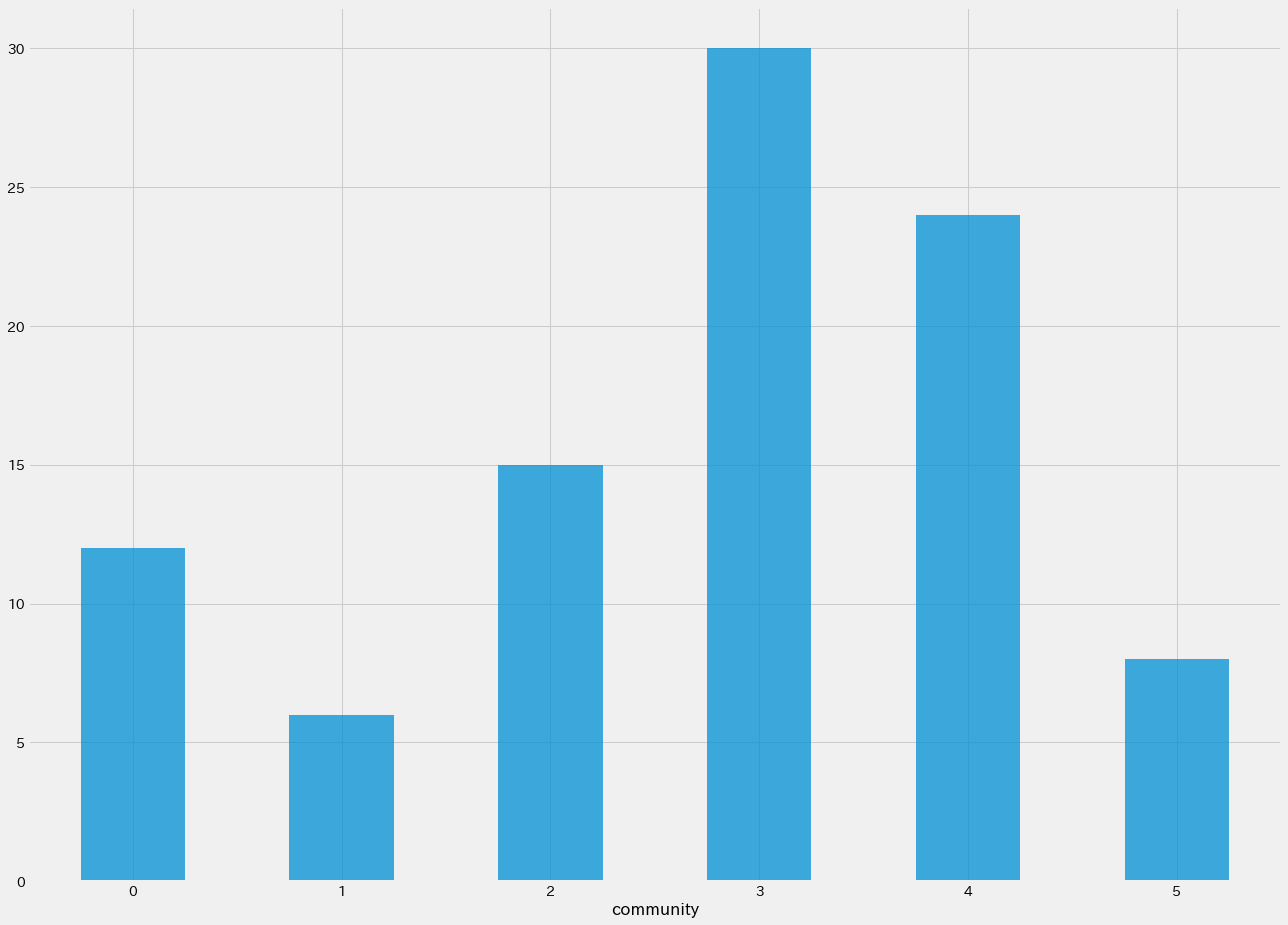

In [331]:
df_pagerank_community.groupby('community').count()['Pokemon'].plot.bar(rot=0, alpha=0.75)

## Plotyでインタラクティブな可視化

In [124]:
import plotly
import plotly.offline as py
import plotly.graph_objects as go

py.init_notebook_mode(connected=False)

In [125]:
pos = nx.spring_layout(G)

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

In [126]:
node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=20,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [127]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append(str(adjacencies[0]) + '\'s connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [128]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network Graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Helpful: <a href='https://plot.ly/python/network-graphs/'> https://plot.ly/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
# fig.show()

In [129]:
tmps = ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "none"]
fig = fig.update_layout(template="plotly_dark")

In [130]:
# plotly.offline.plot(fig, filename='test.html', image_filename='test', image='jpeg')
plotly.offline.plot(fig, filename='test.html')

'test.html'